# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import json 
import ipympl
# %matplotlib
from pylab import rcParams
import math
import requests

In [2]:
clusteringDB=requests.get("https://diseasex-backend.herokuapp.com/humanCases")
clusteringDB.status_code

200

In [3]:
json_data = clusteringDB.json()
# print(type(json_data))
# print(json_data)

In [4]:
with open('humanCase.json', 'w') as json_file:
    json.dump(json_data, json_file)

## Converting JSON to CSV

In [5]:
import json  # For JSON loading
import csv  # For CSV dict writer


def get_leaves(item, key=None, key_prefix=""):
    
    if isinstance(item, dict):
        leaves = {}
        for item_key in item.keys():
            temp_key_prefix = (
                item_key if (key_prefix == "") else (key_prefix + "_" + str(item_key))
            )
            leaves.update(get_leaves(item[item_key], item_key, temp_key_prefix))
        return leaves
    elif isinstance(item, list):
        leaves = {}
        elements = []
        for element in item:
            if isinstance(element, dict) or isinstance(element, list):
                leaves.update(get_leaves(element, key, key_prefix))
            else:
                elements.append(element)
        if len(elements) > 0:
            leaves[key] = elements
        return leaves
    else:
        return {key_prefix: item}


with open("humanCase.json") as f_input, open("final.csv", "w", newline="") as f_output:
    json_data = json.load(f_input, strict=False)
    fieldnames = set()
    for entry in json_data:
        fieldnames.update(get_leaves(entry).keys())
    csv_output = csv.DictWriter(f_output, delimiter=",", fieldnames=sorted(fieldnames))
    csv_output.writeheader()
    csv_output.writerows(get_leaves(entry) for entry in json_data)

## Reading Data

In [6]:
df=pd.read_csv('final.csv')
df
# df.dropna(axis=0,how='any',subset=['lat','long'],inplace=True)

,__v,_id,date,disease__id,disease_livestock__id,disease_livestock_breed,disease_livestock_population,disease_morbidity,disease_mortality,disease_name,...,healthCenter_total_recovered,healthCenter_web,lat,lng,patientAddress,patientContact,patientEmail,patientName,pincode,status
0,0,5ee54dac9ae0961ed86c6ce0,7/19/2020,5ee54dac9ae0961ed86c6ce1,5ee54dac9ae0961ed86c6ce3,Buffalo,6000000.0,40.0,50.0,Azurskey's,...,13,mahilaseva.in,12.347650,93.765430,45/98 6th Lane Haridwar chauk,919829661751,rohan@gmail.com,Rohan Gupta,305001,recovered
1,0,5f0f183b9b46552a244facb2,8/28/2020,5f0eee748ce7e73254e39da8,5f0eee748ce7e73254e39da9,Cow,NaN,NaN,NaN,Tubercolosis,...,12,www.facebook.com,26.180000,78.900000,"Malviya Nagar, Jaipur",919462904912,paro@gmail.com,Paridhi Vijay,302017,infected
2,0,5f11e8d9c1975f37346543c3,7/19/2020,5f11e8d9c1975f37346543c5,NaN,NaN,NaN,NaN,NaN,Elephantiasis,...,10,www.facebook.com,26.845800,75.830300,Kota,918302098279,shubham@gmail.com,Shubham Buccha,32134,infected
3,0,5f1323f93abd1a59a0df7770,7/19/2020,5f0eff2a8ce7e73254e39e4c,5f0eff2a8ce7e73254e39e4d,bufflow,NaN,NaN,NaN,Myopia,...,12,www.facebook.com,26.843486,75.831201,"Plot 962, Narayn Vihar",919079265263,hitesha@gmail.com,Hitesha Sharma,302042,deceased
4,0,5f134f58f807d532f83fee6d,7/23/2020,5f0c46940c182b4878cebd9b,5f0c46940c182b4878cebd9e,Duck,9000000.0,30.0,50.0,Enterotoxaemia (pulpy kidney),...,10,www.facebook.com,26.822978,75.811196,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,srishti@gmail.com,Srishti,305001,deceased
5,0,5f1944b87c3556002477c1d6,7/23/2020,5f1944b87c3556002477c1d8,NaN,NaN,NaN,848.0,561.0,Corona Virus,...,13,www.github.com,26.824268,75.801981,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,khyati.goyal32@gmail.com,Khyati Goyal,305001,recovered
6,0,5f194d847c3556002477c463,8/23/2020,5f194d847c3556002477c465,NaN,NaN,NaN,322.0,871.0,Lukemia,...,57,www.github.com,26.829040,75.801140,"Kotra, Ajmer",911234567890,akshat@gmail.com,Akshat Gupta,305001,recovered
7,0,5f1e97fdb47d650024831cdc,8/6/2020,5f0c63b30c182b4878cebe0d,5f0c63b30c182b4878cebe12,Duck,9000000.0,70.0,20.0,Infectious bovine rhinotracheitis,...,13,www.facebook.com,NaN,NaN,"Plot 97, Ajay nagar",917878787878,nivedita@gmail.com,Nivedita Sharma,302027,recovered


In [7]:
df.dropna(subset=['lat', 'lng'],inplace=True)

In [8]:
# X=df.loc[:,['disease_name','lat','lng']]
X = df
X

,__v,_id,date,disease__id,disease_livestock__id,disease_livestock_breed,disease_livestock_population,disease_morbidity,disease_mortality,disease_name,...,healthCenter_total_recovered,healthCenter_web,lat,lng,patientAddress,patientContact,patientEmail,patientName,pincode,status
0,0,5ee54dac9ae0961ed86c6ce0,7/19/2020,5ee54dac9ae0961ed86c6ce1,5ee54dac9ae0961ed86c6ce3,Buffalo,6000000.0,40.0,50.0,Azurskey's,...,13,mahilaseva.in,12.347650,93.765430,45/98 6th Lane Haridwar chauk,919829661751,rohan@gmail.com,Rohan Gupta,305001,recovered
1,0,5f0f183b9b46552a244facb2,8/28/2020,5f0eee748ce7e73254e39da8,5f0eee748ce7e73254e39da9,Cow,NaN,NaN,NaN,Tubercolosis,...,12,www.facebook.com,26.180000,78.900000,"Malviya Nagar, Jaipur",919462904912,paro@gmail.com,Paridhi Vijay,302017,infected
2,0,5f11e8d9c1975f37346543c3,7/19/2020,5f11e8d9c1975f37346543c5,NaN,NaN,NaN,NaN,NaN,Elephantiasis,...,10,www.facebook.com,26.845800,75.830300,Kota,918302098279,shubham@gmail.com,Shubham Buccha,32134,infected
3,0,5f1323f93abd1a59a0df7770,7/19/2020,5f0eff2a8ce7e73254e39e4c,5f0eff2a8ce7e73254e39e4d,bufflow,NaN,NaN,NaN,Myopia,...,12,www.facebook.com,26.843486,75.831201,"Plot 962, Narayn Vihar",919079265263,hitesha@gmail.com,Hitesha Sharma,302042,deceased
4,0,5f134f58f807d532f83fee6d,7/23/2020,5f0c46940c182b4878cebd9b,5f0c46940c182b4878cebd9e,Duck,9000000.0,30.0,50.0,Enterotoxaemia (pulpy kidney),...,10,www.facebook.com,26.822978,75.811196,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,srishti@gmail.com,Srishti,305001,deceased
5,0,5f1944b87c3556002477c1d6,7/23/2020,5f1944b87c3556002477c1d8,NaN,NaN,NaN,848.0,561.0,Corona Virus,...,13,www.github.com,26.824268,75.801981,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,khyati.goyal32@gmail.com,Khyati Goyal,305001,recovered
6,0,5f194d847c3556002477c463,8/23/2020,5f194d847c3556002477c465,NaN,NaN,NaN,322.0,871.0,Lukemia,...,57,www.github.com,26.829040,75.801140,"Kotra, Ajmer",911234567890,akshat@gmail.com,Akshat Gupta,305001,recovered


In [9]:
count = X['disease_name'].nunique()
# df['hID'].nunique()
count

7

In [10]:
X['disease'] = X['disease_name']

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
dfle = X
dfle.disease = le.fit_transform(dfle.disease)
dfle

,__v,_id,date,disease__id,disease_livestock__id,disease_livestock_breed,disease_livestock_population,disease_morbidity,disease_mortality,disease_name,...,healthCenter_web,lat,lng,patientAddress,patientContact,patientEmail,patientName,pincode,status,disease
0,0,5ee54dac9ae0961ed86c6ce0,7/19/2020,5ee54dac9ae0961ed86c6ce1,5ee54dac9ae0961ed86c6ce3,Buffalo,6000000.0,40.0,50.0,Azurskey's,...,mahilaseva.in,12.347650,93.765430,45/98 6th Lane Haridwar chauk,919829661751,rohan@gmail.com,Rohan Gupta,305001,recovered,0
1,0,5f0f183b9b46552a244facb2,8/28/2020,5f0eee748ce7e73254e39da8,5f0eee748ce7e73254e39da9,Cow,NaN,NaN,NaN,Tubercolosis,...,www.facebook.com,26.180000,78.900000,"Malviya Nagar, Jaipur",919462904912,paro@gmail.com,Paridhi Vijay,302017,infected,6
2,0,5f11e8d9c1975f37346543c3,7/19/2020,5f11e8d9c1975f37346543c5,NaN,NaN,NaN,NaN,NaN,Elephantiasis,...,www.facebook.com,26.845800,75.830300,Kota,918302098279,shubham@gmail.com,Shubham Buccha,32134,infected,2
3,0,5f1323f93abd1a59a0df7770,7/19/2020,5f0eff2a8ce7e73254e39e4c,5f0eff2a8ce7e73254e39e4d,bufflow,NaN,NaN,NaN,Myopia,...,www.facebook.com,26.843486,75.831201,"Plot 962, Narayn Vihar",919079265263,hitesha@gmail.com,Hitesha Sharma,302042,deceased,5
4,0,5f134f58f807d532f83fee6d,7/23/2020,5f0c46940c182b4878cebd9b,5f0c46940c182b4878cebd9e,Duck,9000000.0,30.0,50.0,Enterotoxaemia (pulpy kidney),...,www.facebook.com,26.822978,75.811196,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,srishti@gmail.com,Srishti,305001,deceased,3
5,0,5f1944b87c3556002477c1d6,7/23/2020,5f1944b87c3556002477c1d8,NaN,NaN,NaN,848.0,561.0,Corona Virus,...,www.github.com,26.824268,75.801981,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,khyati.goyal32@gmail.com,Khyati Goyal,305001,recovered,1
6,0,5f194d847c3556002477c463,8/23/2020,5f194d847c3556002477c465,NaN,NaN,NaN,322.0,871.0,Lukemia,...,www.github.com,26.829040,75.801140,"Kotra, Ajmer",911234567890,akshat@gmail.com,Akshat Gupta,305001,recovered,4


In [13]:
count = dfle['disease'].nunique()

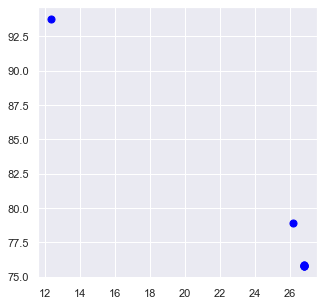

In [14]:
# ax = dfle.plot.scatter(x='lat', y='long', color='DarkGreen',s = 0);
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(dfle['lat'],dfle['lng'],color='blue',s=50)

In [15]:
my_df = dfle.copy()
my_df = my_df.iloc[0:0]
my_df

,__v,_id,date,disease__id,disease_livestock__id,disease_livestock_breed,disease_livestock_population,disease_morbidity,disease_mortality,disease_name,...,healthCenter_web,lat,lng,patientAddress,patientContact,patientEmail,patientName,pincode,status,disease


In [16]:
centers = [0,0]
centers
print(type(centers))

<class 'list'>


## K-Means Clustering

In [17]:
for x in range(count):
    xdf = dfle.loc[dfle['disease'] == x]
#     print(xdf)
    dist_points_from_cluster_center = []
    q = xdf.shape[0]
    temp = xdf.loc[:,['lat','lng']]
    K = range(1,q)
    if(q>1):
        for no_of_clusters in K:
            k_model = KMeans(n_clusters = no_of_clusters)
            k_model.fit(temp)
            dist_points_from_cluster_center.append(k_model.inertia_)

        #Function to find distance between a point and a line
        def calc_distance(x1,y1,a,b,c):
            d = abs((a*x1 + b*y1 +c))/(math.sqrt(a*a + b*b))
            return d
        print(dist_points_from_cluster_center)
        a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[q-2]
        b = K[q-2] - K[0]
        c1 = K[0]*dist_points_from_cluster_center[q-2]
        c2 = K[q-2]*dist_points_from_cluster_center[0]
        c = c1-c2

        distance_of_points_from_line = []
        for k in range(q-1):
            distance_of_points_from_line.append(
            calc_distance(K[k], dist_points_from_cluster_center[k],a,b,c))

        optimum_k = distance_of_points_from_line.index(max(distance_of_points_from_line)) + 1
    else:
        optimum_k = 1
    kmeans = KMeans(n_clusters = optimum_k, init ='k-means++',random_state=50)

    kmeans.fit(temp)
    y = kmeans.fit_predict(temp)
    
    xdf = xdf.copy()
    xdf['cluster_label'] = (y + (x*10))/10
    
    center = kmeans.cluster_centers_
#     print(type(center))
    xdf['cluster_centre_lat'] = center[0,0]
    xdf['cluster_centre_lng'] = center[0,1]
#     xdf['center'] = center
#     print(centers)
#     print(center)
    centers = np.vstack((centers,center))
    xdf
    my_df = my_df.append(xdf,ignore_index=True,sort = False)

Labelled Dataframe

In [21]:
my_df.fillna(0,inplace=True)
my_df

,__v,_id,date,disease__id,disease_livestock__id,disease_livestock_breed,disease_livestock_population,disease_morbidity,disease_mortality,disease_name,...,patientAddress,patientContact,patientEmail,patientName,pincode,status,disease,cluster_label,cluster_centre_lat,cluster_centre_lng
0,0,5ee54dac9ae0961ed86c6ce0,7/19/2020,5ee54dac9ae0961ed86c6ce1,5ee54dac9ae0961ed86c6ce3,Buffalo,6000000.0,40.0,50.0,Azurskey's,...,45/98 6th Lane Haridwar chauk,919829661751,rohan@gmail.com,Rohan Gupta,305001,recovered,0,0.0,12.347650,93.765430
1,0,5f1944b87c3556002477c1d6,7/23/2020,5f1944b87c3556002477c1d8,0,0,0.0,848.0,561.0,Corona Virus,...,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,khyati.goyal32@gmail.com,Khyati Goyal,305001,recovered,1,1.0,26.824268,75.801981
2,0,5f11e8d9c1975f37346543c3,7/19/2020,5f11e8d9c1975f37346543c5,0,0,0.0,0.0,0.0,Elephantiasis,...,Kota,918302098279,shubham@gmail.com,Shubham Buccha,32134,infected,2,2.0,26.845800,75.830300
3,0,5f134f58f807d532f83fee6d,7/23/2020,5f0c46940c182b4878cebd9b,5f0c46940c182b4878cebd9e,Duck,9000000.0,30.0,50.0,Enterotoxaemia (pulpy kidney),...,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,srishti@gmail.com,Srishti,305001,deceased,3,3.0,26.822978,75.811196
4,0,5f194d847c3556002477c463,8/23/2020,5f194d847c3556002477c465,0,0,0.0,322.0,871.0,Lukemia,...,"Kotra, Ajmer",911234567890,akshat@gmail.com,Akshat Gupta,305001,recovered,4,4.0,26.829040,75.801140
5,0,5f1323f93abd1a59a0df7770,7/19/2020,5f0eff2a8ce7e73254e39e4c,5f0eff2a8ce7e73254e39e4d,bufflow,0.0,0.0,0.0,Myopia,...,"Plot 962, Narayn Vihar",919079265263,hitesha@gmail.com,Hitesha Sharma,302042,deceased,5,5.0,26.843486,75.831201
6,0,5f0f183b9b46552a244facb2,8/28/2020,5f0eee748ce7e73254e39da8,5f0eee748ce7e73254e39da9,Cow,0.0,0.0,0.0,Tubercolosis,...,"Malviya Nagar, Jaipur",919462904912,paro@gmail.com,Paridhi Vijay,302017,infected,6,6.0,26.180000,78.900000


# Centers

In [22]:
# centers.remove([0,0])
centers = np.delete(centers, 0,0) 
centers

array([[26.8242683, 75.8019811],
       [26.8458   , 75.8303   ],
       [26.8229775, 75.8111958],
       [26.8290398, 75.8011398],
       [26.8434856, 75.8312014],
       [26.18     , 78.9      ]])

In [23]:
labels = my_df['cluster_label']
len(labels)

7

In [24]:
from collections import Counter, defaultdict
print(Counter(labels))

Counter({0.0: 1, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1, 6.0: 1})


# Visualising Points

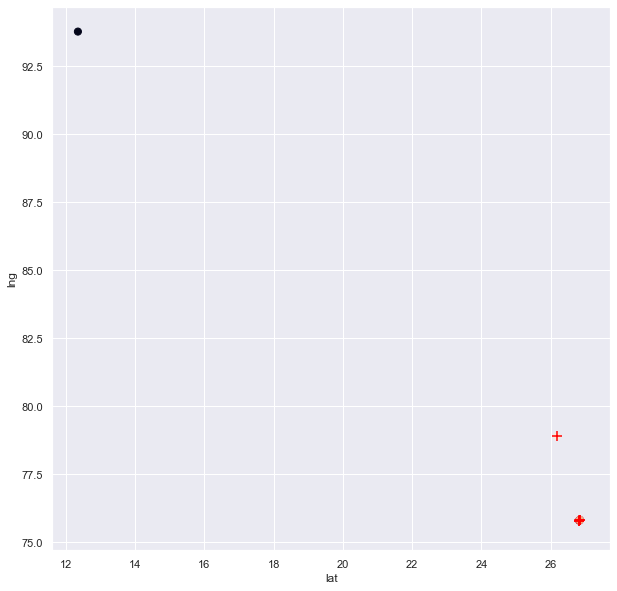

In [25]:
# plt.style.use(['dark_background'])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(my_df['lat'],my_df['lng'],c=labels,s=50)
for i,j in centers:
    ax.scatter(i,j,s=100,c='red',marker='+')
ax.set_xlabel('lat')
ax.set_ylabel('lng')
# plt.colorbar(scatter)

plt.show()

In [26]:
import json

data = centers
list = [{"latitude": x[0], "longitude": x[1]} for x in data]

output = json.dumps(list)

In [27]:
output

'[{"latitude": 26.824268300000004, "longitude": 75.80198109999999}, {"latitude": 26.8458, "longitude": 75.8303}, {"latitude": 26.822977500000004, "longitude": 75.8111958}, {"latitude": 26.8290398, "longitude": 75.80113979999999}, {"latitude": 26.843485600000005, "longitude": 75.83120140000001}, {"latitude": 26.18, "longitude": 78.9}]'

In [28]:
with open('result.json', 'w') as outfile:
    json.dump(output, outfile,indent = 4)

In [29]:
import json
for i in range(my_df.shape[0]):
    ini_string={
        
        "disease": {
            "_id": my_df["disease__id"][i],
            "livestock": [
                {
                    "_id": my_df["disease_livestock__id"][i],
                    "breed": my_df["disease_livestock_breed"][i],
                    "population": my_df["disease_livestock_population"][i]
                }
            ],
            "vaccine": [
                {
                    "_id": my_df["disease_vaccine__id"][i],
                    "name": my_df["disease_vaccine_name"][i],
                    "scientificName": my_df["disease_vaccine_scientificName"][i],
                    "duration": my_df["disease_vaccine_duration"][i],
                    "forHuman": my_df["disease_vaccine_forHuman"][i]
                }
            ],
            "name": my_df["disease_name"][i],
            "scientificName": my_df["disease_scientificName"][i],
            "precautions": my_df["disease_precautions"][i],
            "symptoms": my_df["disease_symptoms"][i],
            "morbidity": my_df["disease_morbidity"][i],
            "mortality": my_df["disease_mortality"][i],
            "total_affected": my_df["disease_total_affected"][i],
            "total_deaths": my_df["disease_total_deaths"][i]
        },
        "healthCenter": {
            "_id": my_df["healthCenter__id"][i],
            "address": my_df["healthCenter_address"][i],
            "email": my_df["healthCenter_email"][i],
            "contact": my_df["healthCenter_contact"][i],
            "name": my_df["healthCenter_contact"][i],
            "incharge": my_df["healthCenter_incharge"][i],
            "pincode": my_df["healthCenter_pincode"][i],
            "web": my_df["healthCenter_web"][i],
            "total_recovered":my_df["healthCenter_total_recovered"][i],
            "total_affected": my_df["healthCenter_total_affected"][i],
            "total_deaths": my_df["healthCenter_total_deaths"][i]
            
        },
        "total_recovered":my_df["disease_total_recovered"][i],
        "total_affected": my_df["disease_total_affected"][i],
        "total_deaths": my_df["disease_total_deaths"][i],
        "__v": my_df["__v"][i],
        "lat": my_df["cluster_centre_lat"][i],
        "lng": my_df["cluster_centre_lng"][i]
    }

    def convert(obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, datetime.datetime):
            return obj.__str__()

    y=json.dumps(ini_string, default=convert)
    headers = {'Accept' : 'application/json', 'Content-Type' : 'application/json'}
    url="https://diseasex-backend.herokuapp.com/outbreaks"
    r = requests.post(url, data=y,headers=headers)
    print(r.status_code)
    
    

200
500
500
200
500
200
200
